In [1]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [2]:
# import sys

In [287]:
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import warnings
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize']= 15,10
rcParams['font.size']= 20
sns.set()

In [288]:
# df=pd.read_csv(r'C:\\Users\\gkrumer108990\\Documents\\PracticalDataScience\\Projects\\Proj02_EDA\\X_test.csv')
df_x=pd.read_csv(r'C:\\Users\\gkrumer108990\\Documents\\PracticalDataScience\\Projects\\Proj02_EDA\\X_train.csv')
df_y=pd.read_csv(r'C:\\Users\\gkrumer108990\\Documents\\PracticalDataScience\\Projects\\Proj02_EDA\\y_train.csv')
df=pd.merge(df_x, df_y, left_index=True, right_index=True)


In [297]:
# df.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis='columns' ,inplace=True)
df.describe()

,source_year,year,month,wday,weight_pounds,plurality,apgar_5min,mother_age,ever_born,father_age,...,child_race,apgar_1min,mother_race,born_alive_alive,born_alive_dead,born_dead,father_race,cigarettes_per_day,drinks_per_week,weight_gain_pounds
count,116774.000000,116774.000000,116774.000000,68527.000000,116774.000000,113590.000000,98304.000000,116774.000000,115895.000000,116774.000000,...,95467.000000,79631.000000,108328.000000,105375.000000,105274.000000,105159.000000,108328.000000,1136.000000,1567.000000,67736.000000
mean,1990.928349,1990.928349,6.568132,4.055686,7.309418,1.026965,25.853261,26.252359,2.160369,39.017521,...,3.779191,52.522648,1.689692,1.247848,0.566921,0.773086,4.289814,16.464789,13.722399,45.019015
std,10.786678,10.786678,3.427259,1.868083,1.329286,0.168901,35.161422,5.895322,1.396918,24.762660,...,3.734469,45.474914,4.503685,3.921974,5.892360,5.580808,13.836230,25.067778,33.150497,29.741982
min,1969.000000,1969.000000,1.000000,1.000000,0.500449,1.000000,0.000000,11.000000,1.000000,12.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1982.000000,1982.000000,4.000000,3.000000,6.624891,1.000000,9.000000,22.000000,1.000000,25.000000,...,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,25.000000
50%,1991.000000,1991.000000,7.000000,4.000000,7.374463,1.000000,9.000000,26.000000,2.000000,30.000000,...,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,34.000000
75%,2000.000000,2000.000000,10.000000,6.000000,8.126239,1.000000,10.000000,30.000000,3.000000,37.000000,...,9.000000,99.000000,1.000000,2.000000,0.000000,0.000000,2.000000,15.000000,2.000000,52.000000
max,2008.000000,2008.000000,12.000000,7.000000,15.487474,4.000000,99.000000,51.000000,32.000000,99.000000,...,58.000000,99.000000,78.000000,77.000000,77.000000,77.000000,99.000000,99.000000,99.000000,99.000000


In [6]:
# data cleanning
df[df['source_year']!=df['year']]
# Year & Source_Year are redundant and one of them can be reduced
df.drop('source_year', axis='columns' ,inplace=True)
#Not required
df.drop(columns = ['wday'],axis='columns', inplace=True)

In [7]:
a = np.array(df['apgar_5min'].values.tolist())
print (a)
df['apgar_5min'] = np.where(a > 10, np.nan, a).tolist()

a = np.array(df['apgar_1min'].values.tolist())
print (a)
df['apgar_1min'] = np.where(a > 10, np.nan, a).tolist()

df.max()

[99.  9. 10. ...  9. 99. nan]
[99.  8.  9. ... nan 99. nan]


year                       2008
month                        12
wday                        7.0
is_male                    True
weight_pounds         15.487474
plurality                   4.0
apgar_5min                 10.0
mother_age                   51
mother_married             True
ever_born                  32.0
father_age                   99
record_weight                 2
cigarette_use              True
alcohol_use                True
day                        99.0
child_race                 58.0
apgar_1min                 10.0
mother_race                78.0
born_alive_alive           77.0
born_alive_dead            77.0
born_dead                  77.0
father_race                99.0
cigarettes_per_day         99.0
drinks_per_week            99.0
weight_gain_pounds         99.0
dtype: object

In [8]:
df.shape

(116774, 28)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116774 entries, 0 to 116773
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    116774 non-null  int64  
 1   month                   116774 non-null  int64  
 2   wday                    68527 non-null   float64
 3   is_male                 116774 non-null  bool   
 4   weight_pounds           116774 non-null  float64
 5   plurality               113590 non-null  float64
 6   apgar_5min              79859 non-null   float64
 7   mother_age              116774 non-null  int64  
 8   mother_married          109989 non-null  object 
 9   ever_born               115895 non-null  float64
 10  father_age              116774 non-null  int64  
 11  record_weight           116774 non-null  int64  
 12  cigarette_use           11774 non-null   object 
 13  alcohol_use             50005 non-null   object 
 14  day                 

In [10]:
df.isnull( ).sum( )

year                           0
month                          0
wday                       48247
is_male                        0
weight_pounds                  0
plurality                   3184
apgar_5min                 36915
mother_age                     0
mother_married              6785
ever_born                    879
father_age                     0
record_weight                  0
cigarette_use             105000
alcohol_use                66769
day                        68527
state                      14417
child_race                 21307
apgar_1min                 76081
mother_residence_state     14418
mother_race                 8446
mother_birth_state         17702
born_alive_alive           11399
born_alive_dead            11500
born_dead                  11615
father_race                 8446
cigarettes_per_day        115638
drinks_per_week           115207
weight_gain_pounds         49038
dtype: int64

In [11]:
#Check for Duplicated
df[df.duplicated()]

,year,month,wday,is_male,weight_pounds,plurality,apgar_5min,mother_age,mother_married,ever_born,...,mother_residence_state,mother_race,mother_birth_state,born_alive_alive,born_alive_dead,born_dead,father_race,cigarettes_per_day,drinks_per_week,weight_gain_pounds


In [298]:
# The assumption is that the weight_Kg is AVG, incases where the plurality is > 1
df['weight_Kg']=df['weight_pounds']*0.45359237
df['weight_gain_kg']=df['weight_gain_pounds']*0.45359237
df[df['plurality']>=2.0][['plurality','ever_born','born_alive_alive','born_alive_dead','born_dead','weight_Kg','weight_gain_kg']]

,plurality,ever_born,born_alive_alive,born_alive_dead,born_dead,weight_Kg,weight_gain_kg
29,2.0,3.0,2.0,0.0,0.0,2.870,44.905645
69,2.0,2.0,1.0,0.0,0.0,1.134,NaN
99,2.0,4.0,NaN,NaN,NaN,2.185,15.875733
105,2.0,1.0,0.0,0.0,2.0,2.353,27.669135
108,2.0,2.0,1.0,0.0,0.0,2.545,44.905645
...,...,...,...,...,...,...,...
116517,2.0,4.0,3.0,0.0,0.0,2.466,13.607771
116642,2.0,3.0,2.0,0.0,0.0,2.381,31.751466
116687,2.0,1.0,0.0,0.0,0.0,2.845,13.607771
116713,2.0,2.0,1.0,0.0,0.0,2.296,19.504472


In [14]:
# 1.What is the corr between Mother Age and born_dead baby 
# 2.What is the corr between Mother smoking habits and born_dead baby [>2003]
# 3.What is the corr between Mother drinking habits and born_dead baby 
# 4.What is the corr between Mother drinking habits on the baby weight
# 5.What is the corr between Mother smoking habits on the baby weight [>2003]
# 6.What is the corr between Mother smoking habits on the baby weight [>2003]
# 7.What is the corr between Mother smoking habits on the baby weight [>2003]
# 8.How the Avg. weight is changed over time (male / female)
# 9.Is the number of born_dead decreasing over time (male / female)?
# 10.Is the number of birth increasing in the hotest seasons (male / female)?

<AxesSubplot:xlabel='year'>

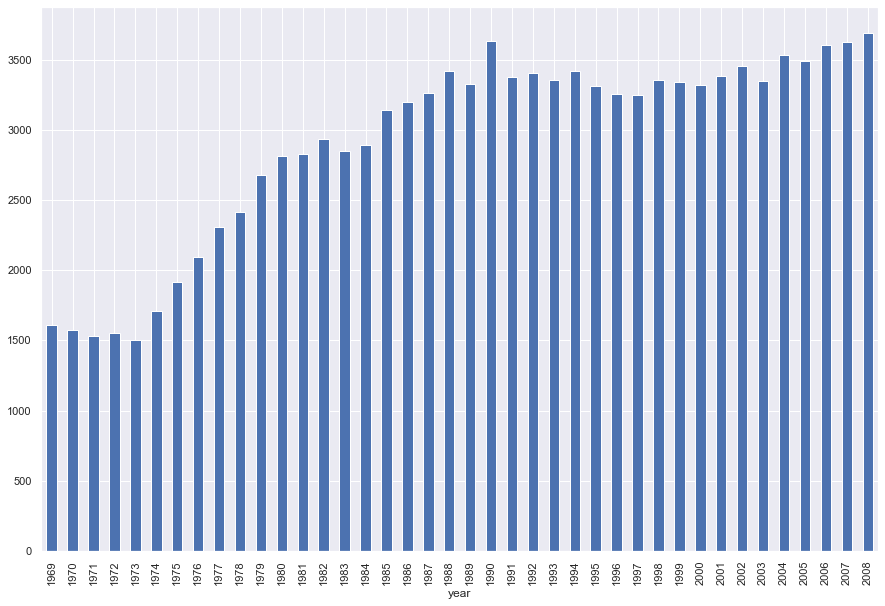

In [15]:
# Samples distribution per year - Check if there are less samples in certain years / periods
year_dist = df.groupby('year').size()
year_dist.plot(kind='bar')

<AxesSubplot:xlabel='month'>

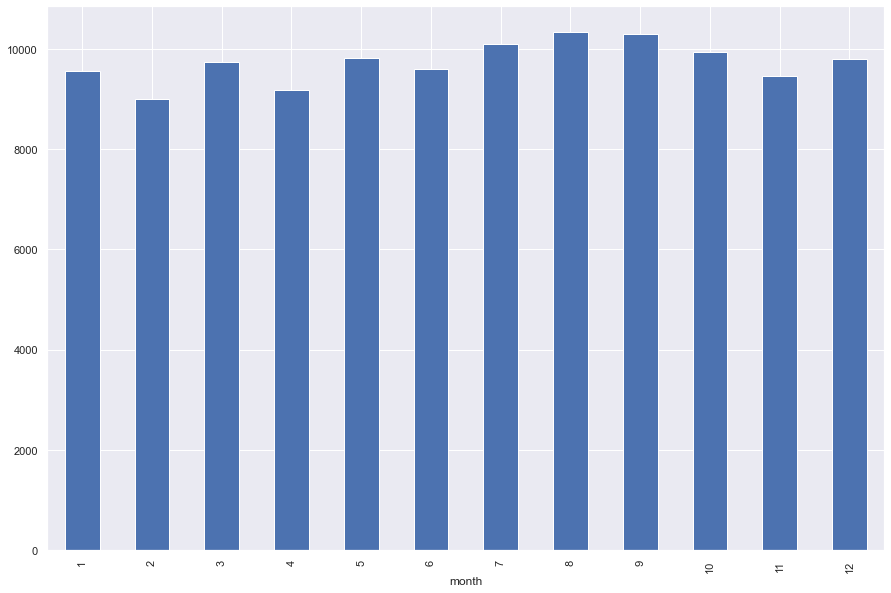

In [299]:
# Samples distribution per month - Check if there are less samples in certain months

month_dist = df.groupby('month').size()
month_dist.plot(kind='bar')

In [17]:
df[df['apgar_5min']>10]

,year,month,is_male,weight_pounds,plurality,apgar_5min,mother_age,mother_married,ever_born,father_age,...,mother_birth_state,born_alive_alive,born_alive_dead,born_dead,father_race,cigarettes_per_day,drinks_per_week,weight_gain_pounds,weight_Kg,weight_gain_kg


In [18]:
df.nunique( )

year                        40
month                       12
is_male                      2
weight_pounds             3043
plurality                    4
apgar_5min                  11
mother_age                  41
mother_married               2
ever_born                   22
father_age                  67
record_weight                2
cigarette_use                2
alcohol_use                  2
day                         32
state                       51
child_race                  13
apgar_1min                  10
mother_residence_state      58
mother_race                 15
mother_birth_state          62
born_alive_alive            24
born_alive_dead             14
born_dead                   18
father_race                 16
cigarettes_per_day          25
drinks_per_week             20
weight_gain_pounds          99
weight_Kg                 3043
weight_gain_kg              99
dtype: int64

In [19]:
# profile = pdp.ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_notebook_iframe()

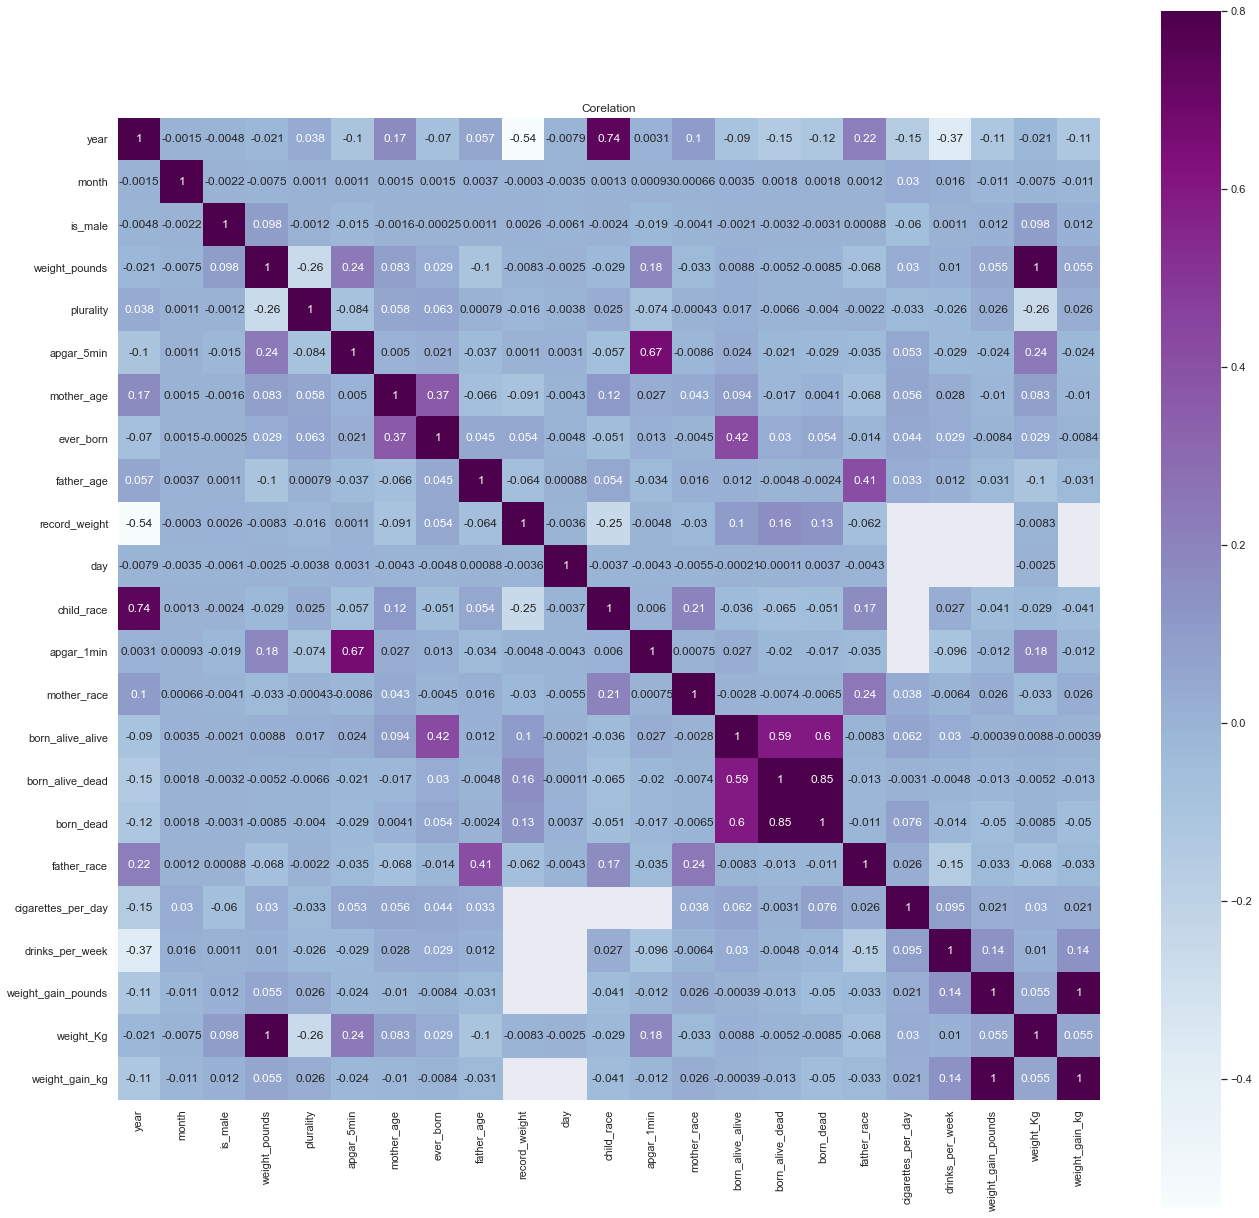

In [20]:
partial_columns =df
matrix = partial_columns.corr()
f, ax = plt.subplots(figsize=(22,22))
ax.set_title('Corelation')
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True);

# Question 1: What is the corr between Mother Age and born_dead baby?

<AxesSubplot:xlabel='born_dead'>

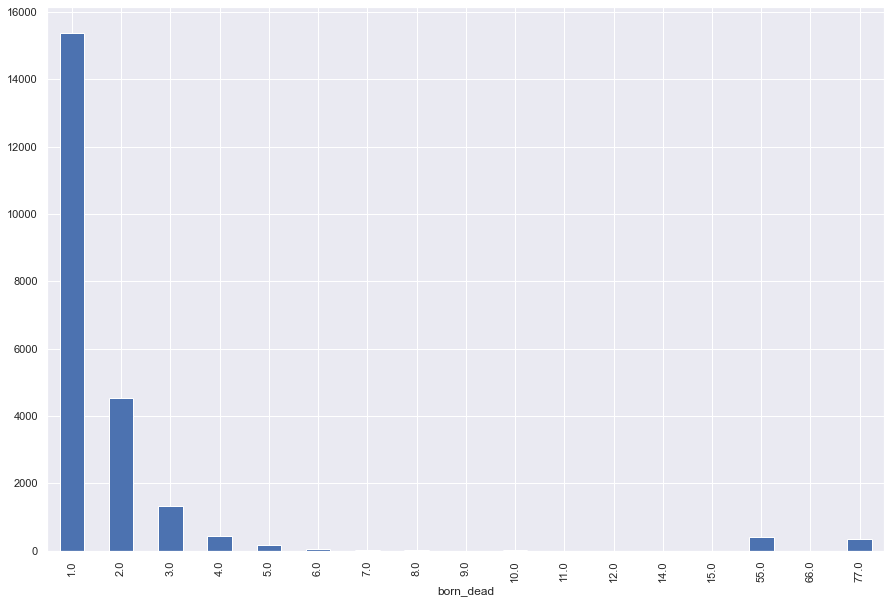

In [21]:
born_dead=df[['mother_age','born_dead']]
#Check for outliers:
born_dead_dist = born_dead[born_dead.born_dead>0].groupby('born_dead').size()
born_dead_dist.plot(kind='bar')
#We see that there are 2 outlier values 55,77
#Also Our Assumption is: Born_Dead values are 

<AxesSubplot:xlabel='mother_age'>

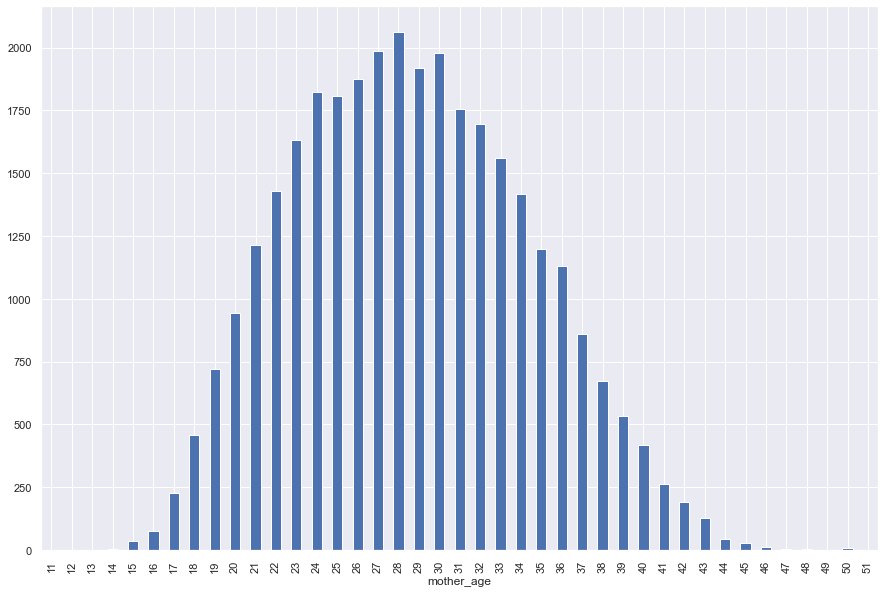

In [22]:
born_dead = born_dead[born_dead.born_dead<=10] #Remove outliers
born_dead_per_age=born_dead.groupby('mother_age')['born_dead'].sum()
# #born_dead_hist
born_dead_per_age.plot(kind='bar')

#Remove 
# born_dead= born_dead[born_dead.born_dead!=77]
# #
# born_dead[born_dead.born_dead==77]

#born_dead= df.groupby('mother_age')

<AxesSubplot:xlabel='mother_age'>

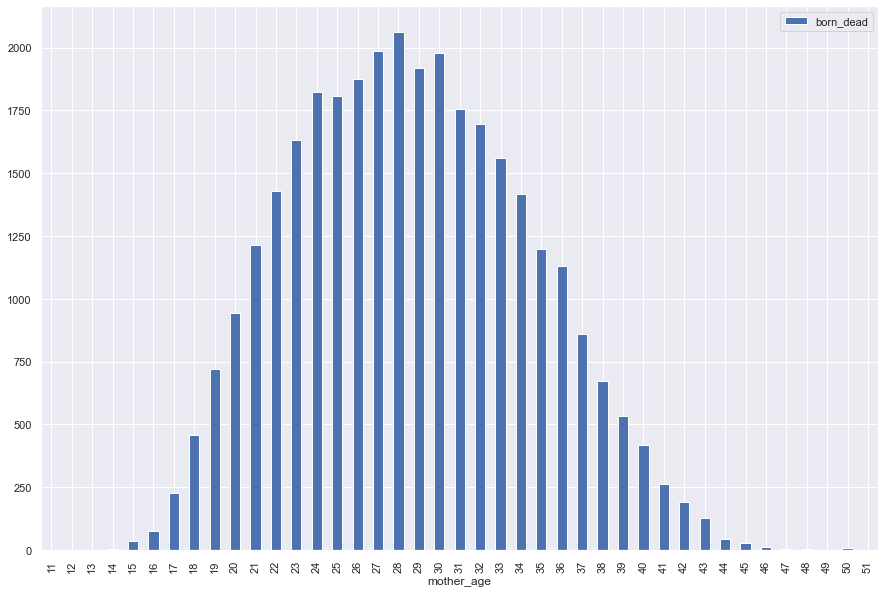

In [23]:
born_per_age=born_dead.groupby('mother_age').agg(func='sum')
born_per_age.plot(kind='bar')

<AxesSubplot:xlabel='mother_age'>

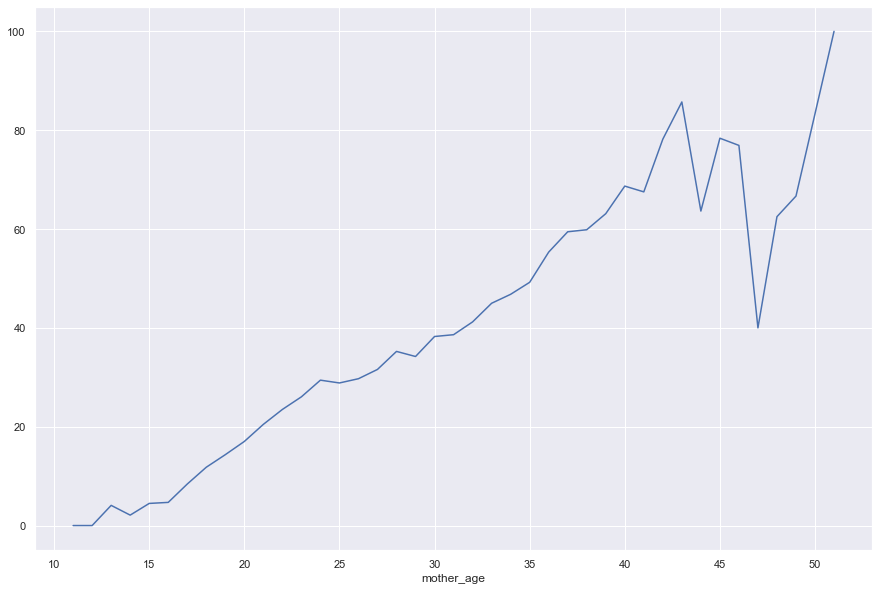

In [24]:
born_per_test_group=born_dead.groupby('mother_age')['born_dead'].agg({'count','sum'})
born_per_test_group['Ratio']=(born_per_test_group['sum']/born_per_test_group['count'])*100
#Remove all record with ratio greater than 100% (Due to our initial assumption)
born_per_test_group[born_per_test_group['Ratio']<=100]['Ratio'].plot(kind='line')

# Count = Total births per age
# Sum = Sum of born_dead
# Ratio = % born_dead per age. 
# This support out initial assumption where the # of born_dead is increasing with mother_age

# Question 2: How smoking affects the baby's weight?

In [25]:
'''
cigarettes_per_day - Data vailable starting 2003) - Min value is '1'. Assumption is that NaN values are = 0 , 99=Garbage
'''
# df[df['year']>=2003].isnull( ).sum( )

df_smoking_pop = df[(df['year']>=2003) & (df['cigarettes_per_day']<99)] # & (df['cigarette_use']>0) )
#df_smoking_pop.info()

df_smoking_pop.groupby('cigarettes_per_day').size().reset_index()

# born_dead=df[['mother_age','born_dead']]
#Check for outliers:
# born_dead_dist = born_dead[born_dead.born_dead>0].groupby('born_dead').size()
# born_dead_dist.plot(kind='bar')
#We see that there are 2 outlier values 55,77
#Also Our Assumption is: Born_Dead values are 

,cigarettes_per_day,0
0,1.0,44
1,2.0,69
2,3.0,76
3,4.0,61
4,5.0,130
5,6.0,36
6,7.0,32
7,8.0,16
8,9.0,3
9,10.0,353


<ipython-input-26-a80501fd1bfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoking_pop_test_group['Sex']=df_smoking_pop_test_group['is_male'].map({False: 'Female', True: 'Male'})


<AxesSubplot:xlabel='cigarettes_per_day', ylabel='weight_Kg'>

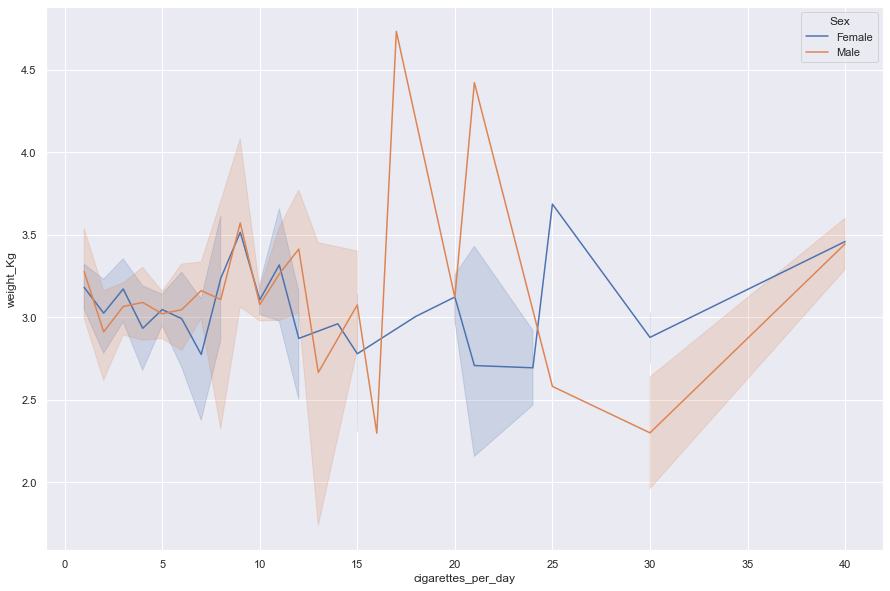

In [26]:

#df_smoking_pop_test_group=df_smoking_pop.groupby('cigarettes_per_day')['weight_Kg'].agg({'mean'})

df_smoking_pop_test_group=df_smoking_pop
df_smoking_pop_test_group['Sex']=df_smoking_pop_test_group['is_male'].map({False: 'Female', True: 'Male'})

df_smoking_pop_test_group
#.replace(to_replace=dict(False='Female', True='Male'), inplace=True)

sns.lineplot(x='cigarettes_per_day', y='weight_Kg', data=df_smoking_pop_test_group, hue='Sex')

# Question 3: How Drinking affects the baby's weight?


In [27]:
'''
cigarette_use - Data vailable starting 2003) - Min value is '1'. Assumption is that NaN values are = 0 , 99=Garbage
'''
# df[df['year']>=2003].isnull( ).sum( )

df_smoking_pop = df[(df['year']>=2003) & (df['drinks_per_week']<99)]
#df_smoking_pop.info()

df_smoking_pop.groupby('drinks_per_week').size().reset_index()

,drinks_per_week,0
0,0.0,855
1,1.0,7
2,2.0,6
3,3.0,1
4,7.0,1


<ipython-input-28-9d7edd689046>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smoking_pop_test_group['Sex']=df_smoking_pop_test_group['is_male'].map({False: 'Female', True: 'Male'})


<AxesSubplot:xlabel='drinks_per_week', ylabel='weight_Kg'>

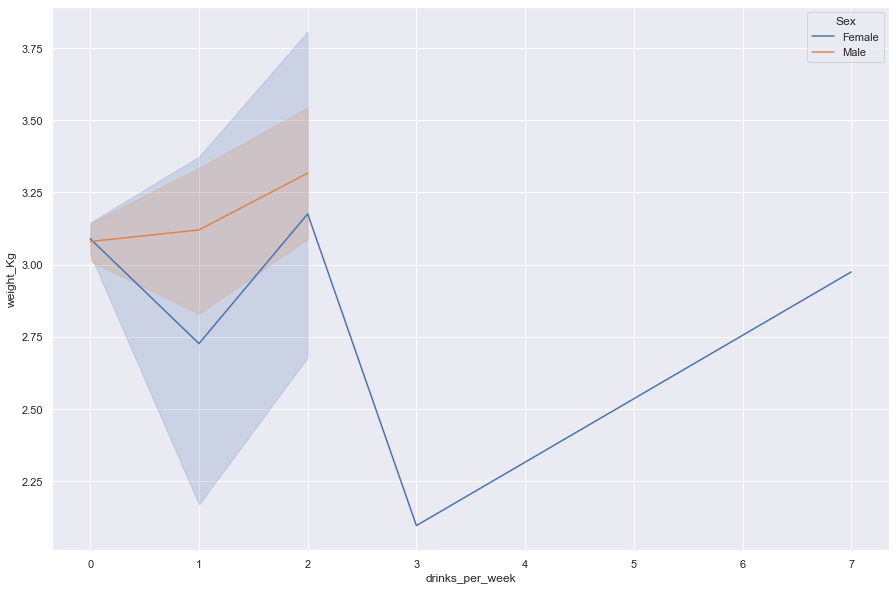

In [28]:
df_smoking_pop_test_group=df_smoking_pop
df_smoking_pop_test_group['Sex']=df_smoking_pop_test_group['is_male'].map({False: 'Female', True: 'Male'})

df_smoking_pop_test_group
#.replace(to_replace=dict(False='Female', True='Male'), inplace=True)

sns.lineplot(x='drinks_per_week', y='weight_Kg', data=df_smoking_pop_test_group, hue='Sex')

# Question 4: Is the number of born_dead decreases over time (male / female)?

In [29]:
'''
Is the number of born_dead decreases over time (male / female)?
'''
df_born_dead_pop = df[(df['born_dead']<55)]
#df_smoking_pop.info()

df_born_dead_pop.groupby('born_dead').size().reset_index()




,born_dead,0
0,0.0,82389
1,1.0,15370
2,2.0,4536
3,3.0,1342
4,4.0,445
5,5.0,166
6,6.0,62
7,7.0,37
8,8.0,28
9,9.0,8


# T_Test

In [30]:
def plt_dist(inp):
    plt.figure()
    ax=sns.distplot(inp)
    plt.axvline(np.mean(inp), color='k' , linestyle='dashed' , linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() /10, 
        max_- max_ / 10 ,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [316]:

# H0: There is no differance between boys and girls weight.
# Alpha = 0.05

boys=df[df['is_male']==True].weight_Kg
girls=df[df['is_male']!=True].weight_Kg

#T-test
ttest,pval = ttest_ind(boys,girls, equal_var=False)
print('H0 : There is no differance between boys and girls weight\n ')
print(f'The t-test is: {ttest} the pval is: {pval}\n')
print( 'alpha was 0.05, so we will reject H0 \n\n ')


H0 : There is no differance between boys and girls weight
 
The t-test is: 33.7207401545592 the pval is: 4.5148351045504876e-248

alpha was 0.05, so we will reject H0 

 


In [317]:
# H0: There is no differance between boys and girls weight.
# Alpha = 0.05

mother_weight=df.year
child_weight =df.year

#T-test
ttest,pval = ttest_ind(mother_weight,child_weight, equal_var=False)
print('H0 : There is no differance between boys and girls weight\n ')
print(f'The t-test is: {ttest} the pval is: {pval}\n')
print( 'alpha was 0.05, so we will reject H0 \n\n ')

H0 : There is no differance between boys and girls weight
 
The t-test is: 0.0 the pval is: 1.0

alpha was 0.05, so we will reject H0 

 


C:\Users\gkrumer108990\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

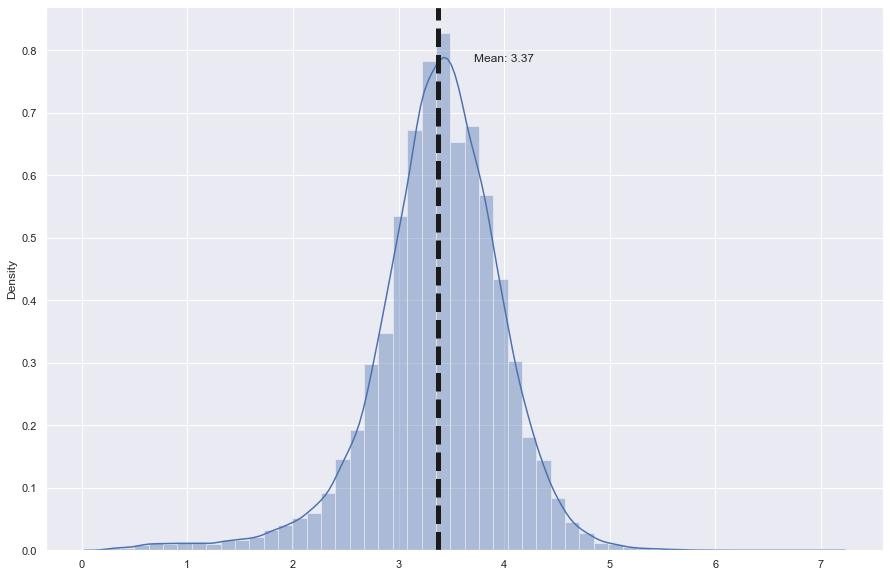

In [34]:
plt_dist(boys.to_numpy())

C:\Users\gkrumer108990\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gkrumer108990\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


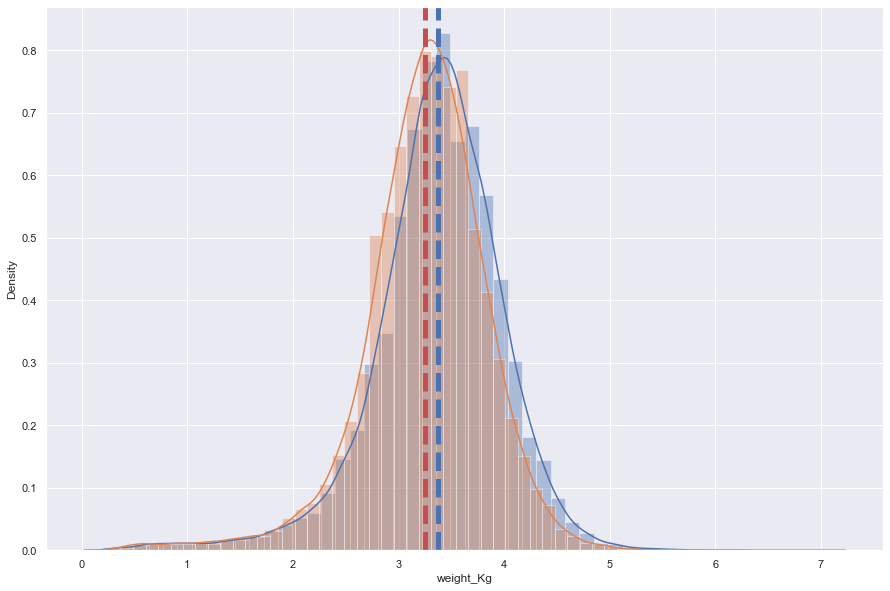

In [35]:
plt.figure()
ax1=sns.distplot(boys)
ax2=sns.distplot(girls)
plt.axvline(np.mean(boys), color='b' , linestyle='dashed', linewidth=5)
plt.axvline(np.mean(girls), color='r' , linestyle='dashed', linewidth=5)


# Regression Project 

In [235]:

#Stats
from scipy.stats import norm
from scipy import stats

#SK
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from six import StringIO
# !pip install pydot
import pydot
from IPython.display import Image, display
# !pip install graphviz
import graphviz
from sklearn import tree
# !pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package











In [302]:
df['Sex']=df['is_male'].map({False: 'Female', True: 'Male'})
# sns.pairplot(df[['year','Sex','weight_Kg','weight_gain_kg','mother_age','plurality']]);

In [301]:
df.groupby('ever_born').size()

ever_born
1.0     44819
2.0     36664
3.0     19401
4.0      8286
5.0      3467
6.0      1536
7.0       759
8.0       448
9.0       214
10.0      126
11.0       71
12.0       41
13.0       26
14.0        8
15.0       10
16.0        5
17.0        6
19.0        2
20.0        2
21.0        1
31.0        2
32.0        1
dtype: int64

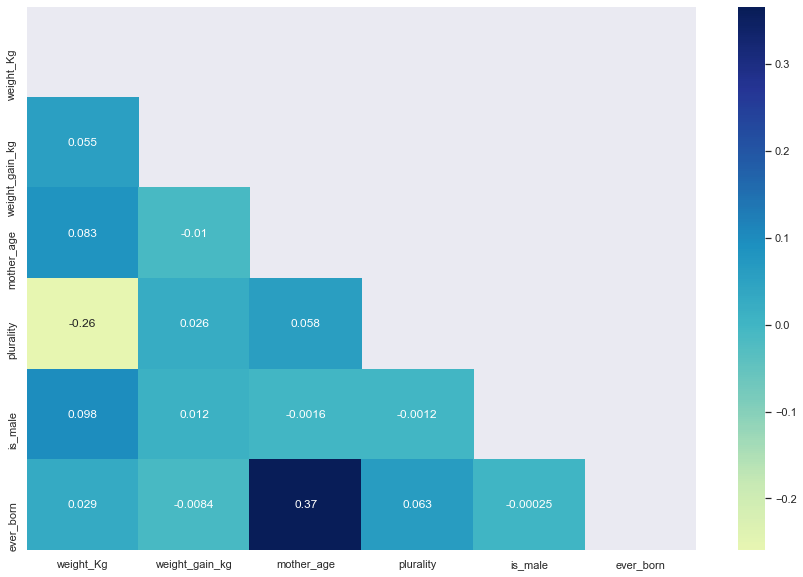

In [304]:
df_r=df[['Sex','weight_Kg','weight_gain_kg','mother_age','plurality','alcohol_use','cigarette_use','is_male','ever_born']]
matrix = np.triu(df_r.corr())
fig = plt.figure()
sns.heatmap(df_r.corr(),annot = True,mask=matrix , cmap= 'YlGnBu', center = 0)
plt.show()

In [74]:
# Replace Bool with 1/0
df_r["cigarette_use"] = (df['cigarette_use'].fillna(0).astype(int).astype(object).where(df['cigarette_use'].notnull()) )
df_r["alcohol_use"] = (df['alcohol_use'].fillna(0).astype(int).astype(object).where(df['alcohol_use'].notnull()) )
df_r["is_male"] = (df['is_male'].fillna(0).astype(int).astype(object).where(df['is_male'].notnull()) )

df_r

<ipython-input-74-e57940375fb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r["cigarette_use"] = (df['cigarette_use'].fillna(0).astype(int).astype(object).where(df['cigarette_use'].notnull()) )
<ipython-input-74-e57940375fb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r["alcohol_use"] = (df['alcohol_use'].fillna(0).astype(int).astype(object).where(df['alcohol_use'].notnull()) )
<ipython-input-74-e57940375fb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,year,Sex,weight_Kg,weight_gain_kg,mother_age,plurality,alcohol_use,cigarette_use,is_male,ever_born
0,1985,Female,3.260,NaN,24,1.0,NaN,NaN,0,1.0
1,1982,Female,3.515,NaN,25,1.0,NaN,NaN,0,2.0
2,1981,Male,3.742,NaN,27,1.0,NaN,NaN,1,9.0
3,1976,Female,3.515,NaN,27,1.0,NaN,NaN,0,1.0
4,1992,Female,2.466,15.875733,17,1.0,0,NaN,0,1.0
...,...,...,...,...,...,...,...,...,...,...
116769,2005,Female,2.830,11.339809,30,1.0,0,0,0,1.0
116770,1992,Female,3.690,44.905645,36,1.0,0,NaN,0,1.0
116771,2006,Male,3.572,14.514956,27,1.0,NaN,NaN,1,NaN
116772,1984,Male,4.338,NaN,33,1.0,NaN,NaN,1,1.0


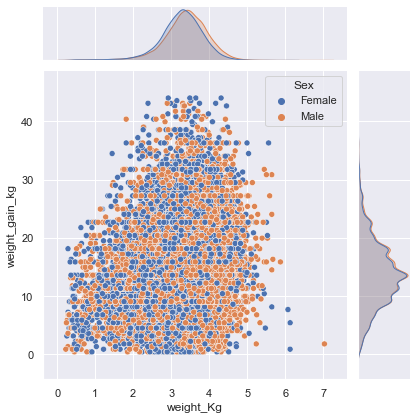

In [75]:
#weight_gain_kg = 44.905645 is an Outlier an is removed.
df_r_weight=df_r[df_r['weight_gain_kg']<44]
# df.groupby('weight_gain_kg').size().plot(kind='bar')

sns.jointplot(x='weight_Kg', y='weight_gain_kg', data=df_r_weight, hue='Sex');

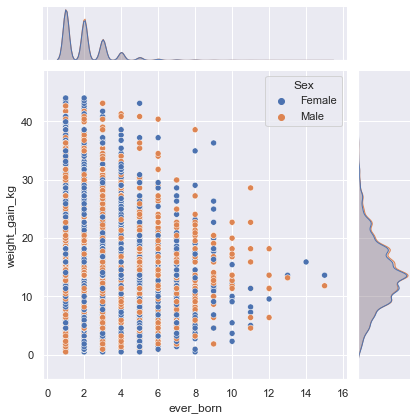

In [76]:
#weight_gain_kg = 44.905645 is an Outlier an is removed.
df_r_weight=df_r[df_r['weight_gain_kg']<44]
# df.groupby('weight_gain_kg').size().plot(kind='bar')

sns.jointplot(x='ever_born', y='weight_gain_kg', data=df_r_weight, hue='Sex');

In [41]:
df_r_weight.corr()

,year,weight_Kg,weight_gain_kg,mother_age,plurality
year,1.000000,-0.050652,0.022019,0.060564,0.023775
weight_Kg,-0.050652,1.000000,0.175603,0.079762,-0.293592
weight_gain_kg,0.022019,0.175603,1.000000,-0.053597,0.084742
mother_age,0.060564,0.079762,-0.053597,1.000000,0.066475
plurality,0.023775,-0.293592,0.084742,0.066475,1.000000


# Spliting Data

In [333]:
#df_r_weight.drop('Sex', axis='columns' ,inplace=True)

#df_r_weight.info()

df_r_weight=df_r[df_r['weight_gain_kg']<44]

nan_col=['weight_Kg','weight_gain_kg','mother_age','plurality','is_male','alcohol_use','cigarette_use','ever_born']

# non_nan_col=['weight_Kg','weight_gain_kg','mother_age','plurality','is_male','ever_born']


df_r_weight=df_r_weight[nan_col]

#Handle missing values

imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(df_r_weight[['ever_born']])
df_r_weight['ever_born'] = imr.transform(df_r_weight[['ever_born']])

imr = imr.fit(df_r_weight[['alcohol_use']])
df_r_weight['alcohol_use'] = imr.transform(df_r_weight[['alcohol_use']])

imr = imr.fit(df_r_weight[['cigarette_use']])
df_r_weight['cigarette_use'] = imr.transform(df_r_weight[['cigarette_use']])


#Train / Test
# X = df_r_weight.drop(['weight_gain_kg'], axis=1)
X = df_r_weight.drop(['weight_gain_kg'], axis=1)

# y= df_r_weight['weight_gain_kg']
y= df_r_weight['weight_gain_kg']
X_train, X_test, y_train, y_test = split(X, y, train_size = 0.8, random_state=333128)

In [340]:
#Fit:
df_lr_r_weight = LinearRegression().fit(X_train, y_train)
print("The model intercept is: {}".format(df_lr_r_weight.intercept_))
print("The model coefficients are: {}".format(df_lr_r_weight.coef_[0]))

The model intercept is: 3.4659779842247502
The model coefficients are: 2.302826108599362


In [339]:
# the model formula
formula_dum = 'weight_gain = ' + f'{df_lr_r_weight.intercept_:.3f}'
for coef, feature in zip(df_lr_r_weight.coef_, X_train.columns[:]):
    formula_dum += f'{coef:+.3f}*{feature}'
print(formula_dum)

weight_gain = 3.466+2.303*weight_Kg-0.041*mother_age+5.206*plurality-0.072*is_male-0.008*alcohol_use+0.915*cigarette_use-0.607*ever_born


In [341]:

# Y Pred Model
y_tr_pred = df_lr_r_weight.predict(X_train)
y_tr_pred

array([ 9.21570738, 14.15065515, 12.26885974, ..., 13.96434867,
       12.95117744, 13.84296711])

In [342]:
# RMSE R^2
rmse_train = np.sqrt(mean_squared_error(y_train, y_tr_pred))

print("R^2 train Data = {:.2f}".format(r2_score(y_train, y_tr_pred)))
print("RMSE train Data = {:.2f}".format(rmse_train))

#R^2 train Data = 0.07 - Our model can predict only 7% (93% of the data cannot be explained) - Excelent!!!

R^2 train Data = 0.07
RMSE train Data = 5.66


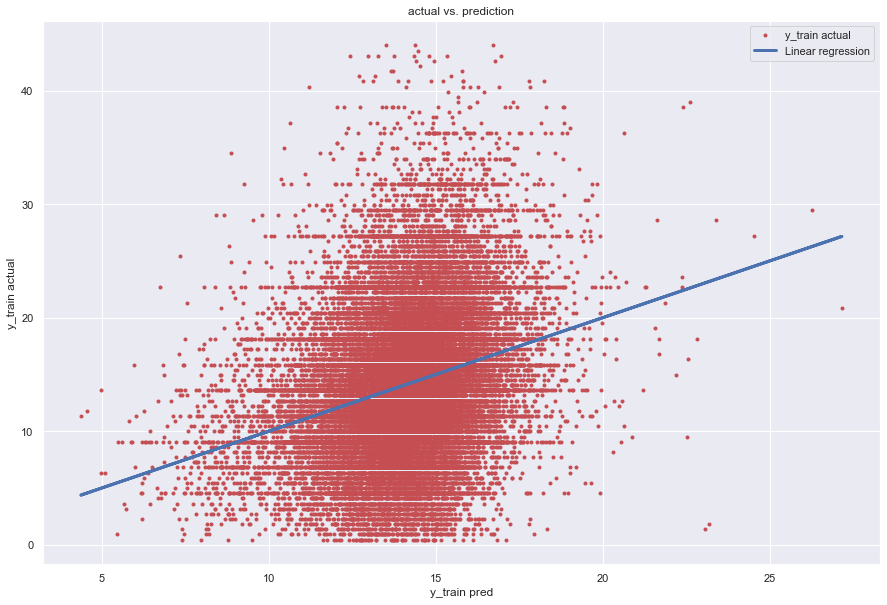

In [338]:
plt.figure()
plt.plot(y_tr_pred, y_train, '.r')
plt.plot(y_tr_pred, y_tr_pred, 
         linewidth=3, color='b')
plt.xlabel('y_train pred')
plt.ylabel('y_train actual')
plt.title('actual vs. prediction')
plt.legend(['y_train actual', 'Linear regression'], loc='best')

In [279]:
# Apply the prediction model on Test data

y_test_pred = df_lr_r_weight.predict(X_test)

In [343]:
# RMSE R^2
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("R^2 Test Data = {:.2f}".format(r2_score(y_test, y_test_pred)))
print("RMSE Test Data = {:.2f}".format(rmse_test))

#R^2 train Data = 0.07 - Our model can predict only 7% (93% of the data cannot be explained) - Excelent!!!

R^2 Test Data = 0.07
RMSE Test Data = 5.65


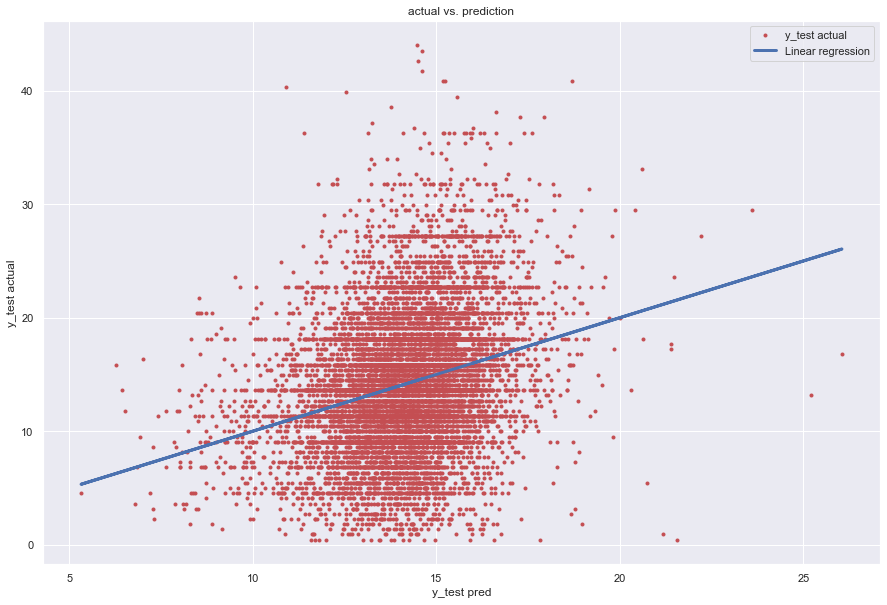

In [344]:
plt.figure()
plt.plot(y_test_pred, y_test, '.r')
plt.plot(y_test_pred, y_test_pred, 
         linewidth=3, color='b')
plt.xlabel('y_test pred')
plt.ylabel('y_test actual')
plt.title('actual vs. prediction')
plt.legend(['y_test actual', 'Linear regression'], loc='best')

# Decision Tree

In [345]:
#Decision Tree model

df_tree = DecisionTreeRegressor(max_leaf_nodes=20, splitter='best') 
df_tree.fit(X_train, y_train)

#max_leaf_nodes = 10 --> RMSE = 5.67
#max_leaf_nodes = 20 --> RMSE = 5.64
#max_leaf_nodes = 20 --> RMSE = 5.63
#max_leaf_nodes = 40 --> RMSE = 5.62

DecisionTreeRegressor(max_leaf_nodes=20)

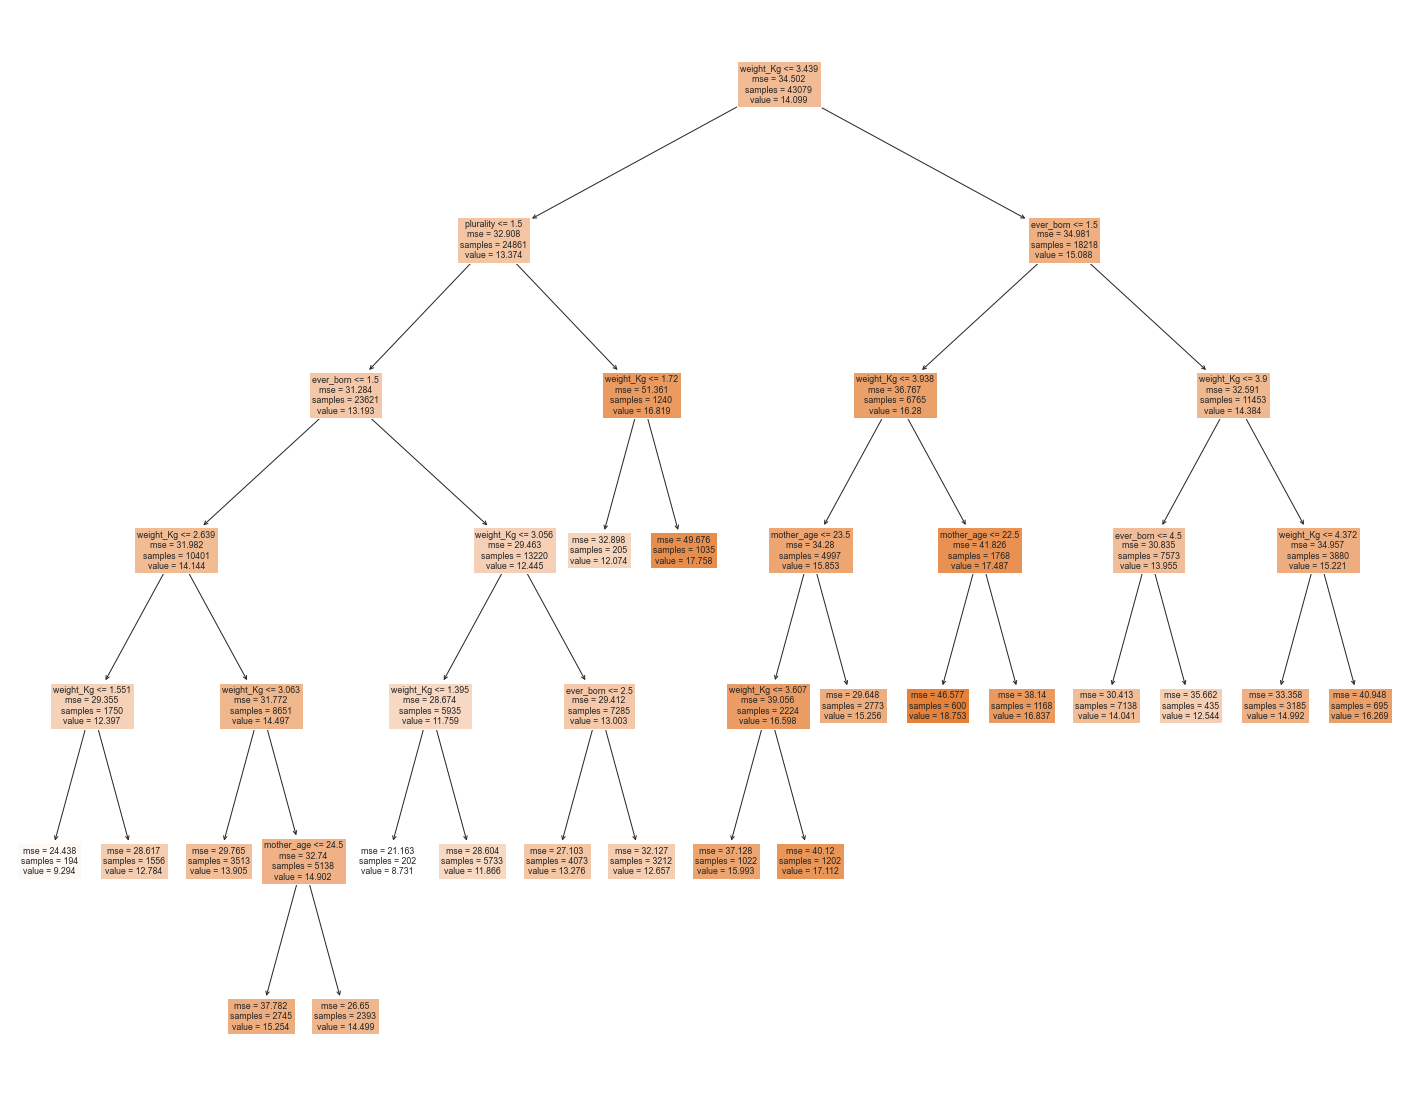

In [283]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(df_tree, 
                   feature_names=X_train.columns,  
                   class_names=y_train,
                   filled=True)


# viz = dtreeviz(df_tree, X, y,
#                 target_name="target",
#                 feature_names=X_train.columns,
#                 class_names=list(y_train))

# viz


In [285]:
y_train_pred_tree = df_tree.predict(X_train)
y_test_pred_tree = df_tree.predict(X_test)

print(f"Train TREE RMSE= {np.sqrt(mean_squared_error(y_train, y_train_pred_tree)):.2f}")
print(f"Test TREE RMSE= {np.sqrt(mean_squared_error(y_test, y_test_pred_tree)):.2f}")

Train TREE RMSE= 5.64
Test TREE RMSE= 5.64


Minimum error:- 0.9609099350046425 at K = 0


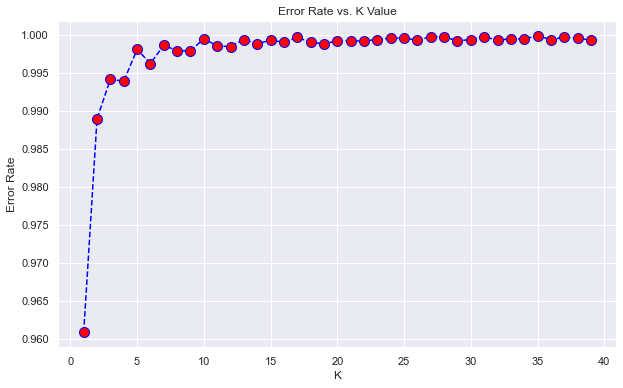

In [348]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
Pred_y_knn = neigh.predict(X_test)
# print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y_knn))


error_rate = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [353]:
knn = KNeighborsRegressor(n_neighbors=2,p=1)
knn.fit(X_train, y_train)

y_knn_pred_train = knn.predict(X_train)
y_knn_pred_test = knn.predict(X_test)


#RMSE train
df_rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_knn_pred_train))
print(f"KNN RMSE TRAIN= {df_rmse_train_knn:.2f}")  

#RMSE test
df_rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_knn_pred_test))
print(f"KNN RMSE TEST= {df_rmse_test_knn:.2f}") 

print(df_rmse_test_knn-df_rmse_train_knn)

KNN RMSE TRAIN= 4.88
KNN RMSE TEST= 6.87
1.9914277592160836
